Populating the interactive namespace from numpy and matplotlib


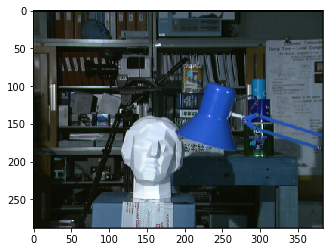

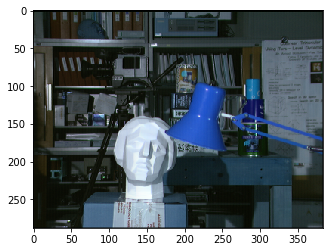

(288, 384, 3)

In [3]:
%pylab inline
%matplotlib inline

import matplotlib.pyplot as plt
from scipy import ndimage
import numpy as np
import cv2

left = "tsukuba-imL.png"
right = "tsukuba-imR.png"

img_left = cv2.imread(left)
img_right = cv2.imread(right)


plt.imshow(img_left)
plt.show()
plt.imshow(img_right)
plt.show()
img_left.shape

In [ ]:
disparity = img_left.shape[1]
blocksize = 5
padd = int(blocksize / 2)
img_depth = np.zeros(img_left.shape)
img_depth_pbb = np.ones((*img_left.shape, img_left.shape[1])) * float("inf")
for y in range(padd, img_left.shape[0] - padd - 1):
    print(y)
    for x in range(padd, img_left.shape[1] - padd - 1):
        y_slice = slice(y - padd, y + padd + 1)
        block_left = img_left[y_slice, x - padd: x + padd + 1,...]
        res = np.ones(img_left.shape[1]) * float("inf")
        for k in range(max(padd, x - disparity), min(img_left.shape[1]- padd - 1, x + disparity)):
            block_right = img_right[y_slice, k - padd: k + padd + 1,...]
            res[k] = np.sum(np.abs(block_left - block_right))

        img_depth[y,x] = np.argmin(res) - x
        img_depth_pbb[y,x,:] = res.copy()

In [ ]:
img_smaller_pbb = np.min(img_depth_pbb[:,:,0,:].reshape(288, 384, 16, -1), axis=-1)

plt.imshow(img_smaller_pbb.argmin(axis=-1), cmap='gray')

img_smaller_pbb.shape